## Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
original_df = df.copy() #copy of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
#Replacing some column names for clarity
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})
#Irrelevant columns dropped
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

## Exploring the distributions

Kernel density estimate and Histogram


Text(0.5, 1.0, 'Total commited by investors')

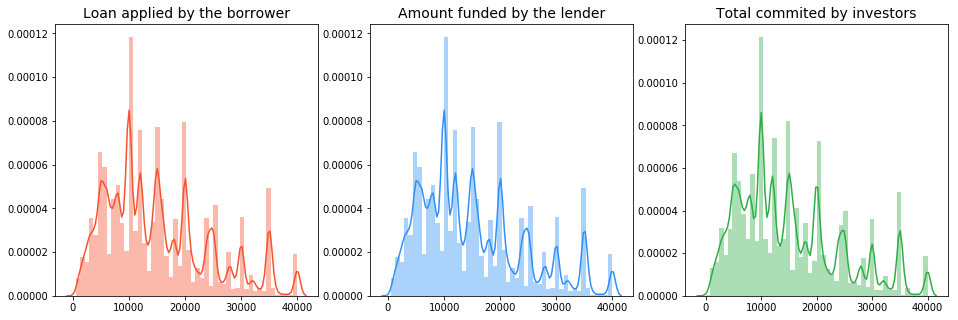

In [8]:
print("Kernel density estimate and Histogram")
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values

sns.distplot(loan_amount, ax=ax[0], color='#F7522F')
ax[0].set_title("Loan applied by the borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color='#2F8FF7')
ax[1].set_title("Amount funded by the lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color='#2EAD46')
ax[2].set_title("Total commited by investors", fontsize=14)

Most of the loans issued were in the range of **10000 to 20000** USD.

The loans **applied** by potential borrowers, the amount **issued** to the borrowers and the amount **funded** by investors are similarly distribution. Hence, it is most likely that qualified borrowers are going to get the loan they had applied for.

In [12]:
#Transforming the issue dates by year (Dec-2011 to 2011)
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

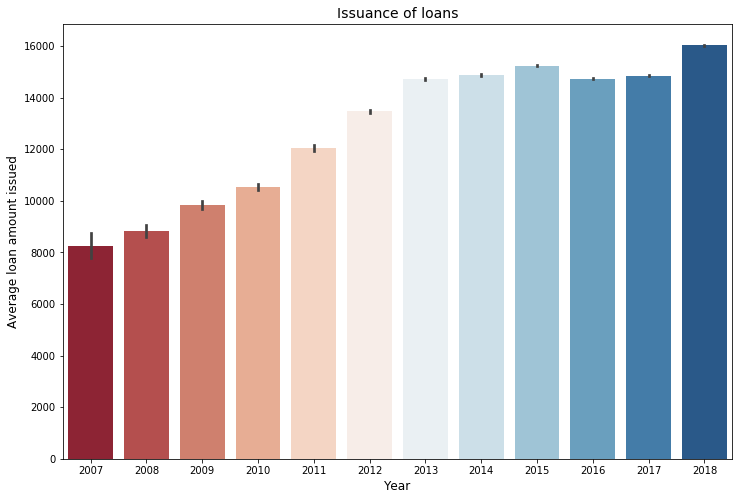

In [14]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='RdBu')
plt.title('Issuance of loans', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average loan amount issued', fontsize=12)

Most of the loans were issued in the year **2018**